# Ex 2.3 Fundamentals of Visualization Libraries - Part 1 

### Import libraries and data 

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [3]:
# Define path

path = r'/Users/andymiller/Desktop/CareerFoundry Data Analytics/3. Data Visualisation with Python/2. Citi Bike/02 Data'

In [4]:
# Import data from csv

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'ny_data.csv'), index_col = False)

/var/folders/w2/ktpt6z_d1353vv2y_fgqj5cm0000gn/T/ipykernel_21084/3521162747.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'Prepared Data', 'ny_data.csv'), index_col = False)


### A bit of data wrangling before we start... 

In [5]:
df.head()

,Unnamed: 0,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,2022-08-27,27.8,both
1,1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,2022-08-20,27.9,both
2,2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,2022-08-31,25.6,both
3,3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,2022-08-02,26.4,both
4,4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,2022-08-25,28.1,both


In [6]:
df.dtypes

Unnamed: 0              int64
ride_id                object
rideable_type          object
start_time             object
end_time               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

In [7]:
# Check for columns with mixed data types

for col in df.columns:
    types = df[col].map(type).unique()
    if len(types) > 1:
        print(col, types)

start_station_name [<class 'str'> <class 'float'>]
start_station_id [<class 'float'> <class 'str'>]
end_station_name [<class 'str'> <class 'float'>]
end_station_id [<class 'float'> <class 'str'>]


In [8]:
# Change these four columns to type string

df['start_station_name'] = df['start_station_name'].astype('str')
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_name'] = df['end_station_name'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')

In [9]:
df.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

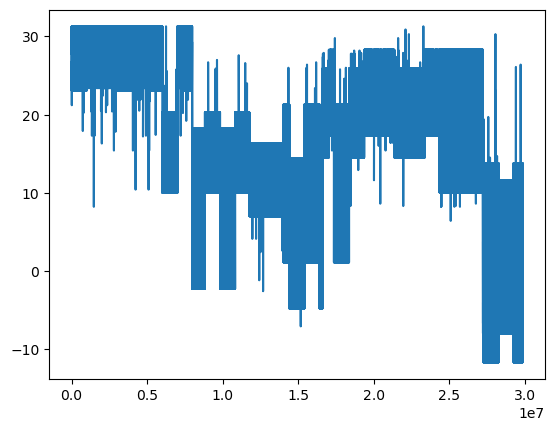

In [10]:
plt.plot(df['avgTemp'])

In [11]:
# This graph looks awful.  Need to try something else.

In [12]:
# It looks like I was supposed to have saved the df_temp dataframe from Ex 2.2 which I didn't do.
# Extract these columns from df

In [13]:
# Take just the unique values of date with avgTemp from df

df_daily_temp = (df[['date', 'avgTemp']].drop_duplicates().sort_values('date').reset_index(drop=True))


In [14]:
df_daily_temp.shape

(402, 2)

In [15]:
df_daily_temp.head()

,date,avgTemp
0,2021-01-30,NaN
1,2021-02-15,NaN
2,2021-03-11,NaN
3,2021-03-14,NaN
4,2021-03-31,NaN


In [16]:
# Drop NaN values

df_daily_temp = (df_daily_temp.dropna(subset=['avgTemp']).reset_index(drop=True))

In [17]:
df_daily_temp.head()

,date,avgTemp
0,2022-01-01,11.6
1,2022-01-02,11.4
2,2022-01-03,1.4
3,2022-01-04,-2.7
4,2022-01-05,3.2


In [18]:
df_daily_temp.shape

(365, 2)

In [19]:
# Set date column as index

df_daily_temp = df_daily_temp.set_index('date')

### 3. Create line plot of temperature using a pandas plotting function


<Axes: title={'center': 'Average Daily Temperature in 2022'}, xlabel='date'>

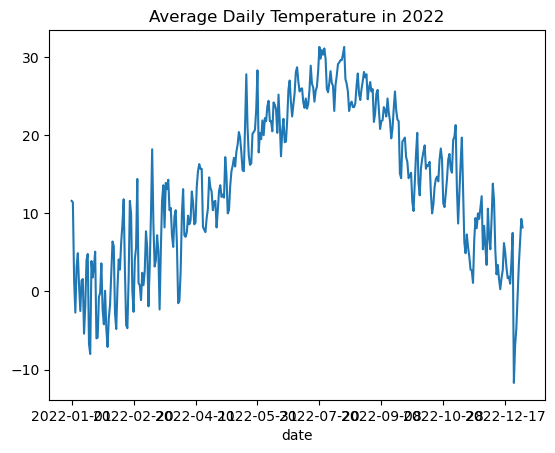

In [20]:
# Use pandas instead of pyplot

df_daily_temp['avgTemp'].plot(
    title='Average Daily Temperature in 2022')

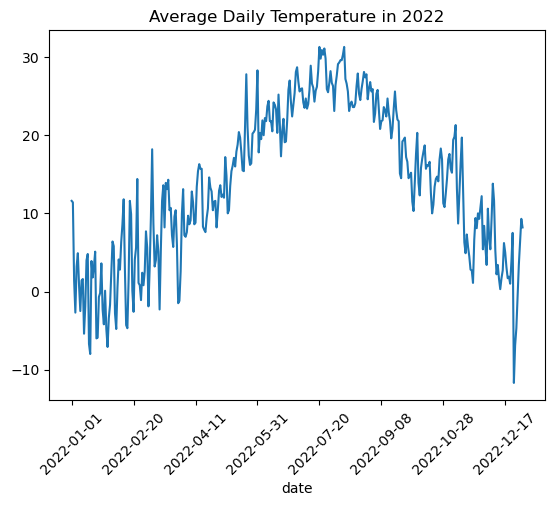

In [21]:
# The dates on the horizontal axis overlap so we can redo this using pandas but need to use 
# matplotlib for the axis settings

line = df_daily_temp['avgTemp'].plot(title='Average Daily Temperature in 2022')
line.tick_params(axis='x', rotation=45)


### 4. Create a column with count of trips per day 

In [22]:
# First let's drop the rows which are outside of 2022 and don't have temperatures

df_2022 = (df.dropna(subset=['avgTemp']).reset_index(drop=True))

In [23]:
df_2022['avgTemp'].isna().sum()

0

In [24]:
# Group by the count of the trips

df_group = pd.DataFrame(df_2022.groupby(['date'])['ride_id'].count()).reset_index()
df_group

,date,ride_id
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230
...,...,...
360,2022-12-27,33044
361,2022-12-28,44027
362,2022-12-29,51674
363,2022-12-30,62298


In [25]:
# Rename trip id column to no_of_trips

df_group.rename(columns = {'ride_id' : 'no_of_trips'}, inplace = True)

In [26]:
df_group

,date,no_of_trips
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230
...,...,...
360,2022-12-27,33044
361,2022-12-28,44027
362,2022-12-29,51674
363,2022-12-30,62298


In [27]:
# Merge this dataframe into df_2022

df_2022 = df_2022.merge(df_group, on = "date", how = 'outer', indicator = '_merge_2')
print(df_2022['_merge_2'].value_counts(dropna = False))
print("Shape of January 1st is", df_2022[df_2022['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df_2022[df_2022['date'] == '2022-01-02'].shape) # Second check 

df_date_indexed = df_2022.set_index('date')

print(df_date_indexed.columns)

both          29838166
left_only            0
right_only           0
Name: _merge_2, dtype: int64
Shape of January 1st is (20428, 19)
Shape of January 2nd is (43009, 19)
Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'no_of_trips', '_merge_2'],
      dtype='object')


In [28]:
df_date_indexed.head()

,Unnamed: 0,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,_merge,no_of_trips,_merge_2
date,,,,,,,,,,,,,,,,,,
2022-08-27,0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,27.8,both,117835,both
2022-08-27,291,81748F5BA904DFD2,classic_bike,2022-08-27 22:20:56.003,2022-08-27 22:25:39.250,E 15 St & 3 Ave,5863.07,Ave A & E 14 St,5779.11,40.734232,-73.986923,40.730311,-73.980472,casual,27.8,both,117835,both
2022-08-27,327,A697741A87C95690,classic_bike,2022-08-27 11:19:07.642,2022-08-27 11:26:19.188,E 5 St & Cooper Sq,5712.12,E 2 St & Avenue C,5476.03,40.727690,-73.990993,40.720874,-73.980858,member,27.8,both,117835,both
2022-08-27,341,81C36C45D6AD553A,electric_bike,2022-08-27 19:39:19.265,2022-08-27 20:02:51.369,Grand Concourse & E 161 St,8021.11,River Ave & E 151 St,7967.04,40.827134,-73.922736,40.822217,-73.928939,casual,27.8,both,117835,both
2022-08-27,383,B4237A2BDC864298,classic_bike,2022-08-27 22:32:36.359,2022-08-27 22:38:53.330,Grand Army Plaza & Central Park S,6839.1,W 51 St & Rockefeller Plaza,6700.14,40.764397,-73.973715,40.759738,-73.978116,casual,27.8,both,117835,both


In [29]:
df_date_indexed.shape

(29838166, 18)

In [30]:
df_date_indexed.tail()

,Unnamed: 0,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,_merge,no_of_trips,_merge_2
date,,,,,,,,,,,,,,,,,,
2022-12-25,29837047,EBEE2BF65062228D,classic_bike,2022-12-25 17:14:39.301,2022-12-25 17:22:14.010,Van Dam St & Greenpoint Ave,5883.06,36 St & Hunters Point Ave,5992.02,40.734436,-73.937908,40.737817,-73.930241,member,-6.9,both,9164,both
2022-12-25,29837257,5285F7C5566AF6AA,electric_bike,2022-12-25 11:03:17.469,2022-12-25 11:20:22.051,Clermont Ave & Lafayette Ave,4461.01,Cadman Plaza E & Tillary St,4677.01,40.687305,-73.969597,40.695977,-73.990149,casual,-6.9,both,9164,both
2022-12-25,29837854,CF4D17224ACBF018,classic_bike,2022-12-25 19:59:03.603,2022-12-25 20:04:58.756,11 Ave & W 27 St,6425.04,W 20 St & 8 Ave,6224.05,40.751396,-74.005226,40.743453,-74.000040,member,-6.9,both,9164,both
2022-12-25,29838478,483D17D9EE47524B,classic_bike,2022-12-25 12:16:14.667,2022-12-25 12:23:33.549,E 9 St & 5 Ave,5872.1,Stanton St & Chrystie St,5523.02,40.732759,-73.995817,40.722293,-73.991475,member,-6.9,both,9164,both
2022-12-25,29838706,49436C97390BCF78,electric_bike,2022-12-25 11:29:17.325,2022-12-25 11:36:15.335,Avenue D & E 3 St,5436.09,Bleecker St & Crosby St,5679.08,40.720687,-73.978029,40.726156,-73.995102,member,-6.9,both,9164,both


In [31]:
# Sort into date order

df_date_indexed = df_date_indexed.sort_index(ascending=True)

In [32]:
# Make sure that the index is actually datetime64[ns]

df_date_indexed.index.dtype

dtype('O')

In [33]:
# Change this so type is datetime64[ns] and verify

df_date_indexed.index = pd.to_datetime(df_date_indexed.index)
df_date_indexed.index.dtype

dtype('<M8[ns]')

In [34]:
# This is NumPy's notation for datetime type with nanosecond precision so now I can draw the graph.

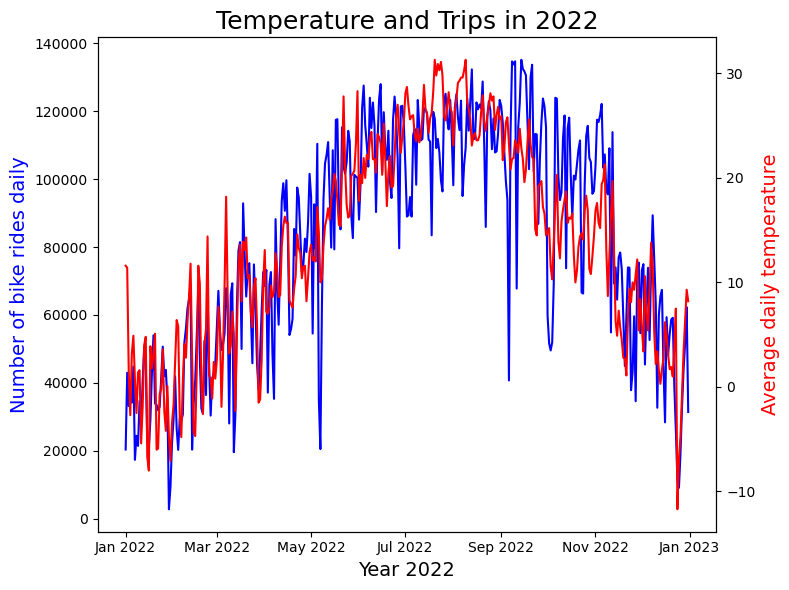

In [38]:
# Draw dual axis plot showing number of trips and average temperature against time.

import matplotlib.dates as mdates

fig,ax = plt.subplots(figsize = (8,6))

ax.plot(df_date_indexed.index, df_date_indexed['no_of_trips'], color = "blue")
ax.set_xlabel("Year 2022", fontsize = 14)
ax.set_ylabel("Number of bike rides daily", color = "blue", fontsize = 14)

ax2 = ax.twinx()

ax2.plot(df_date_indexed.index, df_date_indexed['avgTemp'],color = "red")
ax2.set_ylabel("Average daily temperature", color = "red", fontsize = 14)

# Control the ticks on the x-axis for readability
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 3, 5, 7, 9, 11]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title("Temperature and Trips in 2022", fontsize = 18)

plt.tight_layout()
# Save plot as png file
plt.savefig(os.path.join(path,'Temperature_trips_line.png'), dpi=300, bbox_inches="tight")
plt.show()


In [37]:
# Export dataframe df_date_indexed

df_date_indexed.to_csv(os.path.join(path,'Prepared Data', 'ny_data_merged.csv'))

### 6. Explain the code to draw the above graph

<b>fig,ax = plt.subplots(figsize = (8,6))</b>

This line defines two objects as subplots to the chart, fig which represents the figure or container in which the graph will appear and ax with defines the axes.  The (8,6) sets the width and height of the figure.

<br>
<b>ax.plot(df_date_indexed.index, df_date_indexed['no_of_trips'], color = "blue")<br>
ax.set_xlabel("Year 2022", fontsize = 14)<br>
ax.set_ylabel("Number of bike rides daily", color = "blue", fontsize = 14)</b>

The ax.plot line above plots the values from the 'no_of_trips' of trips column in blue while the date is forced to be the the x-axis and that matplotlib recognises this to actually be a date.
The next two lines specify the axis labels and what fontsize and colour (if not black) should be used.

<br>
<b>ax2 = ax.twinx()</b>

Using ax2 defines a second, separate y-axis and twinx() makes this into a dual axis plot.

<br>
<b>ax2.plot(df_date_indexed.index, df_date_indexed['avgTemp'],color = "red")<br>
ax2.set_ylabel("Average daily temperature", color = "red", fontsize = 14)</b>

ax2.plot tells the second line to be of the 'avgTemp' data in red with the date again forced to be recognised as a date.  The set_ylabel line puts a label on the second y-axis and determines the fontsize and colour of the text.

<br>
<b>import matplotlib.dates as mdates<br>
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 3, 5, 7, 9, 11]))<br>
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))</b>

importing matplotlib.dates allows for finer control over the axis ticks so that they can be spaced out every second month with the format being specified as "month year".

<br>
<b>plt.title("Temperature and Trips in 2022", fontsize = 18)</b>

This line puts a title above the plot and specifies the font size.

<br>
<b>plt.tight_layout()</b>

This line ensures that titles, and labels don't overlap with other plot features.

<br>
<b>plt.savefig(os.path.join(path,'Temperature_trips_line.png'), dpi=300, bbox_inches="tight")</b>

This line, which must go before plot.show() saves a png file of the graph into the folder defined by the path.  The dpi is the resolution of the image meausured in dots (pixels) per inch, 300 being a suitably high resolution for reports. bbox_inches="tight" ensures that none of the titles of labels get cut off or lie outside the figure.

<br>
<b>plt.show()</b>

Finally plt.show() displays the graph in the notebook so we can actually see it.
<br>
<br>
The paradigm used was Object-Oriented since the figure and axes objects were created explicitly and then called methods on the axes to control the plot as described above.



### Bonus Task

### 1. Create a histogram of "tripduration"

In [4]:
# Re-import merged data following kernel crash

df_date_indexed = pd.read_csv(os.path.join(path, 'Prepared Data', 'ny_data_merged.csv'), index_col = 'date')

/var/folders/w2/ktpt6z_d1353vv2y_fgqj5cm0000gn/T/ipykernel_83107/3411680404.py:3: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_date_indexed = pd.read_csv(os.path.join(path, 'Prepared Data', 'ny_data_merged.csv'), index_col = 'date')


In [13]:
df_date_indexed.dtypes

Unnamed: 0              int64
ride_id                object
rideable_type          object
start_time             object
end_time               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
_merge                 object
no_of_trips             int64
_merge_2               object
dtype: object

In [5]:
# The start_time and end_time columns need to be datetime in order to subtract

df_date_indexed['start_time'] = pd.to_datetime(df_date_indexed['start_time'], errors='coerce')
df_date_indexed['end_time']   = pd.to_datetime(df_date_indexed['end_time'], errors='coerce')


In [6]:
# Create trip_duration column but calculating end_time - start_time then converting to minutes

df_date_indexed['trip_duration'] = (df_date_indexed['end_time'] - df_date_indexed['start_time']).dt.total_seconds()/60

In [7]:
df_date_indexed['trip_duration'].describe()

count    2.983817e+07
mean     1.820962e+01
std      2.614485e+02
min     -5.728892e+01
25%      5.796733e+00
50%      1.016200e+01
75%      1.799900e+01
max      4.044810e+05
Name: trip_duration, dtype: float64

In [21]:
# Count number of trips which are shorter than 200 mins. 

(df_date_indexed['trip_duration'] < 200).sum()

29734519

In [9]:
# Filter data before plotting histogram

df_plot = df_date_indexed[df_date_indexed['trip_duration'] <= 200]


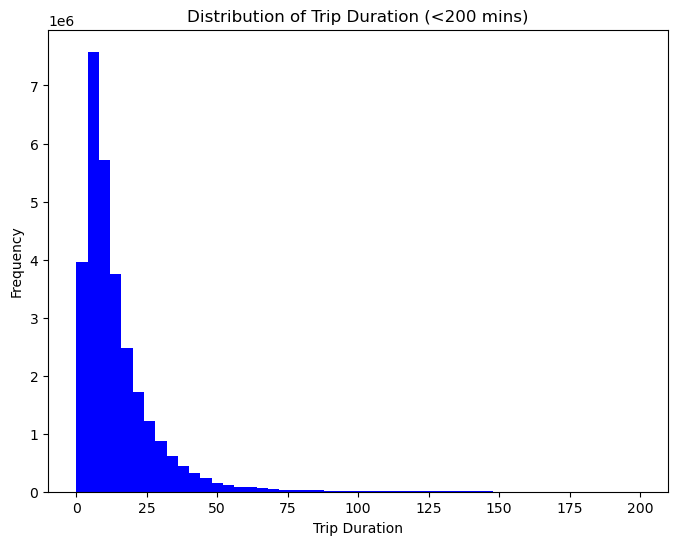

In [53]:
# Histogram of "trip_duration" for rentals less than 200 mins

plt.figure(figsize=(8,6))
plt.hist(df_plot['trip_duration'], bins=50, range = (0,200),color='blue')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration (<200 mins)')
plt.savefig(os.path.join(path,'trip_duration_hist.png'), dpi=300, bbox_inches="tight")
plt.show()         

### 2. Add a curve following the bins 

In [22]:
# Compute the values where the curve will go and where the edges of the bins lie

counts, bin_edges = np.histogram(df_plot['trip_duration'], bins=50, range=(0,200))

In [23]:
# Calculate the mid points of the bins

bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

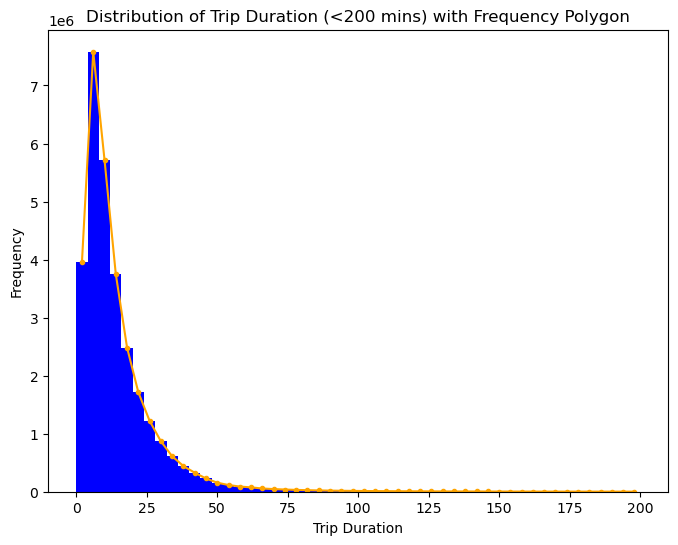

In [54]:
# Plot histogram and overlay the frequency polygon

plt.figure(figsize=(8,6))

# Histogram
plt.hist(df_plot['trip_duration'], bins=50, range=(0,200),color='blue')

# Frequency polygon
plt.plot(bin_centers, counts, marker='.',color='orange')

plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration (<200 mins) with Frequency Polygon')

plt.savefig(os.path.join(path,'trip_duration_hist_with_line.png'), dpi=300, bbox_inches="tight")
plt.show()   

### 3. Figure with bar chart of "usertype" and pie chart of "gender" 

In [37]:
df_date_indexed.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'no_of_trips', '_merge_2',
       'trip_duration'],
      dtype='object')

In [38]:
df_date_indexed.head()

,Unnamed: 0,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,_merge,no_of_trips,_merge_2,trip_duration
date,,,,,,,,,,,,,,,,,,,
2022-01-01,29246414,A68CF80FD4099195,electric_bike,2022-01-01 04:27:20.917,2022-01-01 05:12:45.261,W 107 St & Columbus Ave,7619.05,W 110 St & Amsterdam Ave,7646.04,40.799757,-73.962113,40.802692,-73.962950,member,11.6,both,20428,both,45.405733
2022-01-01,28544530,25C911DDFF549E96,classic_bike,2022-01-01 12:58:09.835,2022-01-01 13:31:53.029,Broadway & W 61 St,7014.12,Park Ave & E 124 St,7682.01,40.770030,-73.981968,40.804555,-73.939686,member,11.6,both,20428,both,33.719900
2022-01-01,28544606,E67B8B6533210284,electric_bike,2022-01-01 06:40:11.372,2022-01-01 06:48:52.852,E 85 St & York Ave,7146.04,W 87 St & Amsterdam Ave,7458.03,40.775369,-73.948034,40.788390,-73.974700,member,11.6,both,20428,both,8.691333
2022-01-01,28544612,AD0DA4602B983464,classic_bike,2022-01-01 01:41:34.103,2022-01-01 01:51:56.845,Fulton St & Waverly Ave,4345.11,Sullivan Pl & Franklin Ave,3704.08,40.683239,-73.965996,40.664080,-73.960251,casual,11.6,both,20428,both,10.379033
2022-01-01,28544634,21E1ADCF4F034ED0,electric_bike,2022-01-01 02:50:32.445,2022-01-01 02:56:45.541,Central Park W & W 91 St,7453.01,E 97 St & 3 Ave,7365.08,40.788665,-73.966801,40.785920,-73.948603,member,11.6,both,20428,both,6.218267


The task here asks me to do the following:

"Create a figure with two axes that represent different plots: one of the plots is a bar chart with the variable “usertype,” and the other one is a pie chart illustrating the variable “gender.” Hint: you need to use the OO approach here; two axes don’t mean a dual axis. Read this article on suplots, axes, and figures for some useful information!"

However there is no information for gender.  Some research indicates that citibike data stopped including gender and usertype around 2020.  It looks like this task is outdated and has been copied by CareerFoundry from an older version of the course.  

For the sake of practising drawing the graphs I will instead plot a bar graph of "member_casual" and the pie_chart can be for the variable "rideable_type".

### 3. (new version)  Figure with bar chart of "member_casual" and pie chart of "rideable_type"

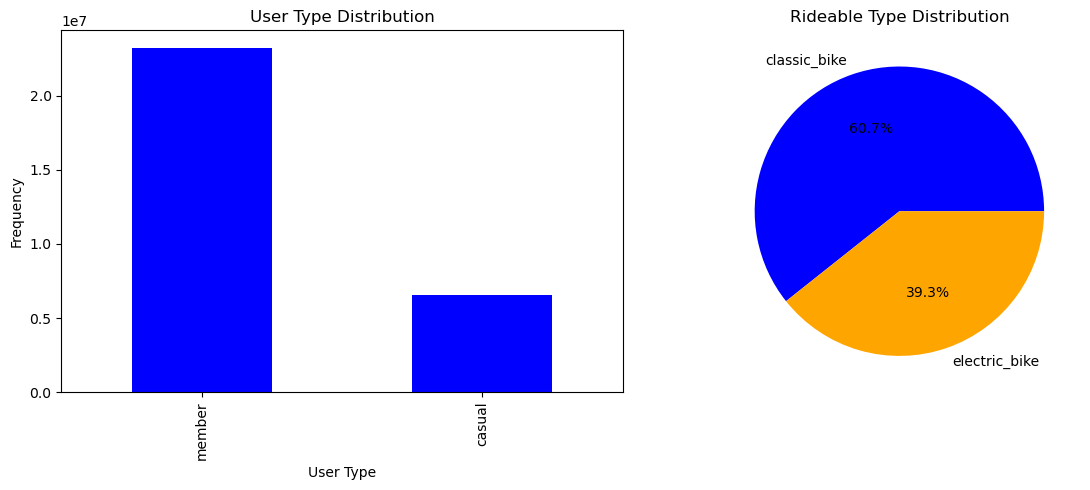

In [57]:

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Bar chart of member vs casual
df_date_indexed['member_casual'].value_counts().plot(kind='bar', 
                                                     ax=axes[0], 
                                                     color='blue')

axes[0].set_title('User Type Distribution')
axes[0].set_xlabel('User Type')
axes[0].set_ylabel('Frequency')


# Pie chart of rideable type
df_date_indexed['rideable_type'].value_counts().plot(kind='pie',
                                                     ax=axes[1],
                                                     autopct='%1.1f%%',
                                                     colors=['blue','orange'])

axes[1].set_title('Rideable Type Distribution')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig(os.path.join(path,'bar_and_pie_charts.png'), dpi=300, bbox_inches="tight")
plt.show()

